In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

##### 一個channel, 所以(28, 28) → (28, 28, 1)
紅綠藍：3個 channel, 灰階只有1個channel

In [5]:
# 壓到0到1之間，所以除以 255
x_train = x_train.reshape(60000, 28, 28, 1) / 255

In [6]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [7]:
# 做 one hot enconding
from tensorflow.keras.utils import to_categorical

In [8]:
y_train = to_categorical(y_train, 10)

In [9]:
y_test = to_categorical(y_test, 10)

### CNN 決定
conv
1. filter 大小（? x ?）建議3x3
2. filter 個數（建議2的?次方）

如果有3個channel，還是2D，但是權重就會是3x3x3

max-pooling
2x2


## 讀數必要的函式

In [10]:
# 打開空的數據學習機
from tensorflow.keras.models import Sequential
# 學習
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

## Step 1 打造函數學習機（CNN）

In [11]:
model = Sequential()

###### 第一輪

In [12]:
# 32 filter 數量 （5, 5）filter 大小
# padding='same': 輸入 28x28 輸出28x28
model.add(Conv2D(32, (5, 5), padding='same',
                            input_shape=(28, 28, 1), # inpout dimension
                            activation='relu'))
# 輸出 32個 28x28 矩陣， 28x28 疊了32層
# 事實上（28, 28, 32）

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# (14, 14, 32)
# 28x28 每張都是 2x2 ，所以只剩下一半(14, 14)，總共有32個channel

###### 第二輪

In [14]:
model.add(Conv2D(64, (5, 5), padding='same',
                activation='relu'))
# 輸出 14x14 大小，共有64張記分板

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# 輸出 7x7 大小，共有64張記分板 (7, 7, 64)

###### 第三輪

In [16]:
model.add(Conv2D(128, (5, 5), padding='same',
                activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
# 拉平
model.add(Flatten())

In [19]:
# Dense
model.add(Dense(54, activation='relu'))

In [20]:
# 10: 輸出10個數字，softmax: 10個數字加起來等於1
model.add(Dense(10, activation='softmax'))

## 看一下我們的神經網路

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

小結

832 = (5x5+1)x32

51264 = (5x5*32+1)x64

204928 = (5x5*64+1)x128

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.087), 
                     metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, batch_size=200, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 46s 764us/sample - loss: 0.0513 - accuracy: 0.9841
Epoch 2/8
60000/60000 [==============================] - 46s 765us/sample - loss: 0.0419 - accuracy: 0.9866
Epoch 3/8
60000/60000 [==============================] - 46s 761us/sample - loss: 0.0337 - accuracy: 0.9895
Epoch 4/8
60000/60000 [==============================] - 46s 764us/sample - loss: 0.0293 - accuracy: 0.9909
Epoch 5/8
60000/60000 [==============================] - 46s 768us/sample - loss: 0.0244 - accuracy: 0.9928
Epoch 6/8
60000/60000 [==============================] - 46s 774us/sample - loss: 0.0209 - accuracy: 0.9937
Epoch 7/8
60000/60000 [==============================] - 49s 812us/sample - loss: 0.0177 - accuracy: 0.9948
Epoch 8/8
60000/60000 [==============================] - 48s 801us/sample - loss: 0.0160 - accuracy: 0.9952


## Step 3 預測

In [27]:
result = model.predict_classes(x_test)

In [28]:
def my_predict(n):
    print('CNN 預測是: ', result[n])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap='Greys')

CNN 預測是:  7


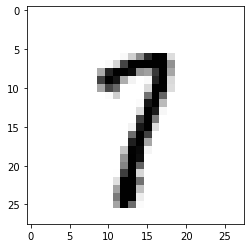

In [29]:
my_predict(411)

In [30]:
from ipywidgets import interact_manual

In [31]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [32]:
score = model.evaluate(x_test, y_test, batch_size=12)

10000/10000 [==============================] - 3s 285us/sample - loss: 0.0258 - accuracy: 0.9908


In [33]:
loss, acc = score
print('測試資料的正確率為', acc)

測試資料的正確率為 0.9908


作業嘗試修正
* filter 大小: 5x5
* 第一輪的 filter個數：32
* 第一輪的 filter個數：64
* 第一輪的 filter個數：128
* loss='categorical_crossentropy'
* batch_size=200, epochs=8

準確率高達：0.9952

練習參數計算
* 832 = (5x5+1)x32
* 51264 = (5x5*32+1)x64
* 204928 = (5x5*64+1)x128

In [ ]:
# 32 filter 數量 （5, 5）filter 大小